# 1.  Memuat Dataset

In [3]:
# Mengimpor pustaka yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, auc, confusion_matrix
)

# Memuat dataset dari URL
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/flu.csv"
df = pd.read_csv(url)



# 2. EDA dan Visualisasi

Analisis Data Eksploratif (EDA)

5 data pertama:
  Diagnosis InitialPCRDiagnosis   Age Sex  neutrophil  \
0      H1N1                 NaN  67.0   F         NaN   
1      H1N1                 NaN  29.0   M         NaN   
2      H1N1                 NaN  22.0   F         NaN   
3      H1N1                 NaN  20.0   F         NaN   
4      H1N1                 NaN  21.0   M         NaN   

   serumLevelsOfWhiteBloodCell  lymphocytes CReactiveProteinLevels  \
0                          NaN          NaN                    NaN   
1                          NaN          NaN                    NaN   
2                          NaN          NaN                    NaN   
3                          NaN          NaN                    NaN   
4                          NaN          NaN                    NaN   

   DurationOfIllness CTscanResults RiskFactors GroundGlassOpacity Diarrhea  \
0                NaN           NaN         NaN                NaN      NaN   
1                NaN           

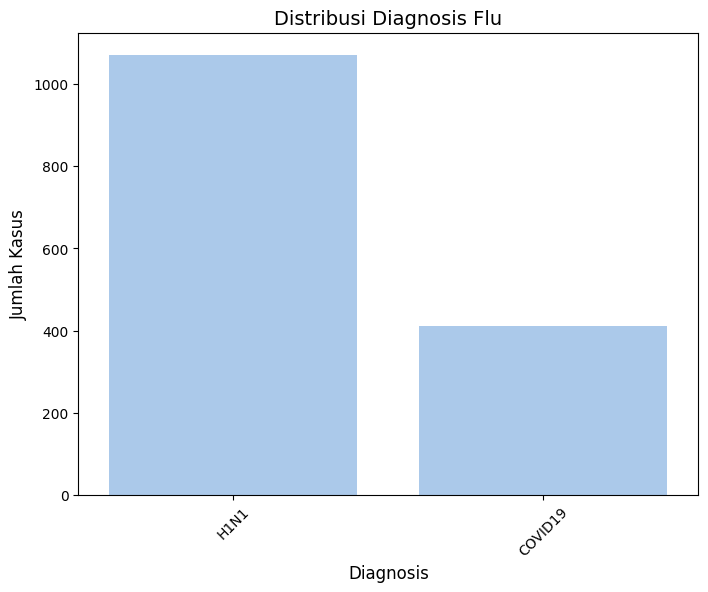

In [4]:
# Menampilkan informasi dasar dataset
print("="*50)
print("Analisis Data Eksploratif (EDA)")
print("="*50)
print("\n5 data pertama:")
print(df.head())
print("\nInformasi dataset:")
print(df.info())
print("\nStatistik deskriptif:")
print(df.describe(include='all'))

# Menyesuaikan palet warna untuk visualisasi
sns.set_palette("pastel")

# Visualisasi distribusi target
plt.figure(figsize=(8,6))
sns.countplot(x='Diagnosis', data=df)
plt.title('Distribusi Diagnosis Flu', fontsize=14)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Jumlah Kasus', fontsize=12)
plt.xticks(rotation=45)
plt.show()



# 3. Feature Engineering

In [5]:
# Memisahkan fitur dan target
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Mengidentifikasi kolom numerik dan kategorikal
numeric_features = X_train.select_dtypes(include=np.number).columns
categorical_features = X_train.select_dtypes(include='object').columns

# Menyusun pipeline untuk pra-pemrosesan data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)])


# 4. Model Training

In [6]:
# Inisialisasi model regresi logistik
model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Menyusun pipeline yang mencakup pra-pemrosesan dan model
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)])

# Melatih model dengan data pelatihan
clf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'neutrophil', 'serumLevelsOfWhiteBloodCell', 'lymphocytes',
       'DurationOfIllness', 'Temperature'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['InitialPCRDiagnosis', 'Sex', 'CReactiveProteinLevels', 'CTscanResults',
       'RiskFactors', 'GroundGlassOpacity', 'Diarrhea', 'Fever', 'Coughing',
       'ShortnessOfBreath', 'SoreThroat', 'NauseaVomitting', 'Fatigue'],
      dtype='object'))])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

# 5. Evaluasi Model


Training Metrics:
Akurasi   : 0.8486
Presisi   : 0.8568
Recall    : 0.8486
F1-Score  : 0.8514
AUC-ROC   : 0.9208


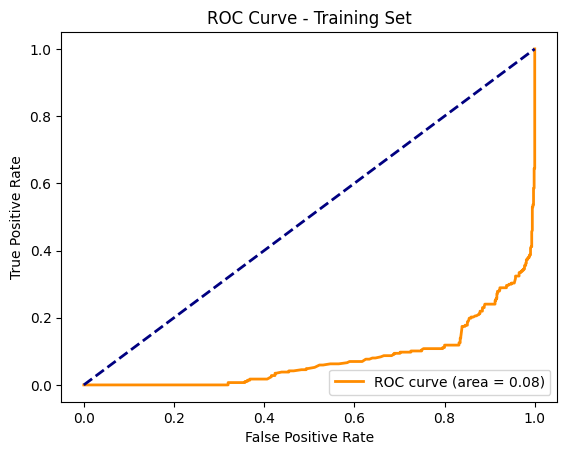

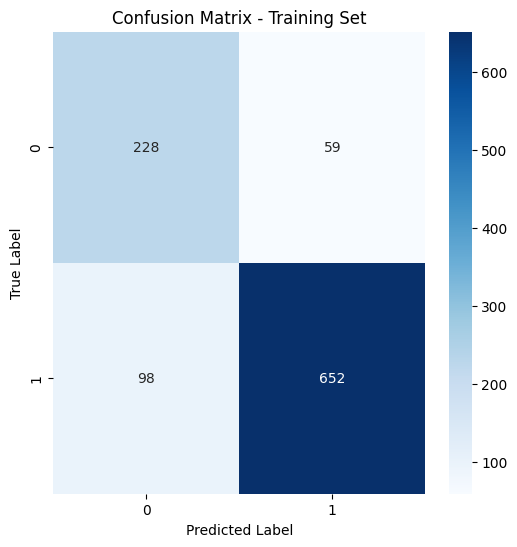


Test Metrics:
Akurasi   : 0.8315
Presisi   : 0.8319
Recall    : 0.8315
F1-Score  : 0.8317
AUC-ROC   : 0.8771


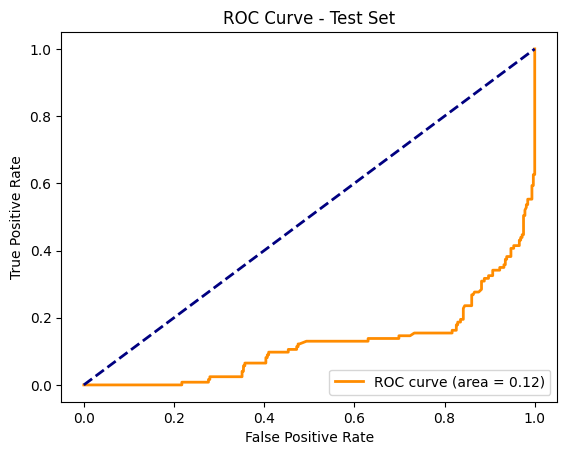

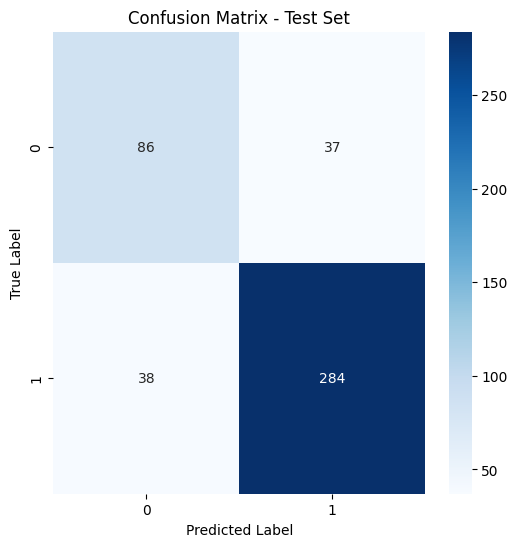

In [7]:
# Fungsi untuk mengevaluasi kinerja model
def evaluate_model(model, X, y, set_name='Test'):
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)

    # Menghitung metrik evaluasi
    acc = accuracy_score(y, y_pred)
    pre = precision_score(y, y_pred, average='weighted')
    rec = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    roc_auc = roc_auc_score(y, y_proba[:, 1])

    print(f"\n{set_name} Metrics:")
    print(f"Akurasi   : {acc:.4f}")
    print(f"Presisi   : {pre:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1-Score  : {f1:.4f}")
    print(f"AUC-ROC   : {roc_auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y, y_proba[:, 1], pos_label='COVID19')
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {set_name} Set')
    plt.legend(loc="lower right")
    plt.show()

    # Matriks Kebingungannya
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {set_name} Set')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return acc, pre, rec, f1, roc_auc

# Evaluasi kinerja model pada data pelatihan dan pengujian
train_metrics = evaluate_model(clf, X_train, y_train, 'Training')
test_metrics = evaluate_model(clf, X_test, y_test, 'Test')



## **1. Akurasi (Accuracy)**
Mengukur proporsi prediksi benar dari seluruh prediksi:
$$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

## **2. Presisi (Precision)**
Mengukur akurasi prediksi positif:
$$ \text{Precision} = \frac{TP}{TP + FP} $$

## **3. Recall (Sensitivity)**
Mengukur kemampuan menemukan kasus positif:
$$ \text{Recall} = \frac{TP}{TP + FN} $$

## **4. F1-Score**
Rata-rata harmonik presisi dan recall:
$$ F_1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

## **5. AUC-ROC**
Luas di bawah kurva ROC:
$$ \text{AUC} = \int_{0}^{1} \text{TPR}(\text{FPR}^{-1}(x)) dx $$

Dimana:
- $\text{TPR} = \frac{TP}{TP + FN}$ (True Positive Rate/Recall)
- $\text{FPR} = \frac{FP}{FP + TN}$ (False Positive Rate)